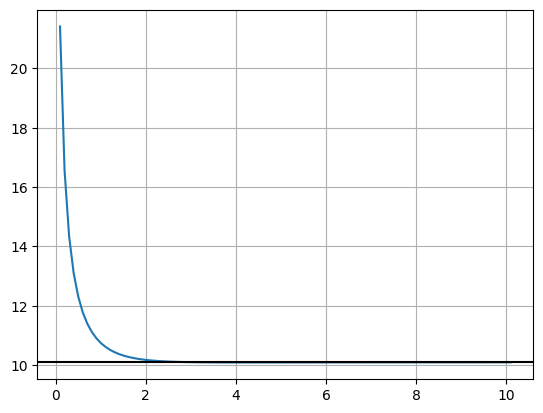

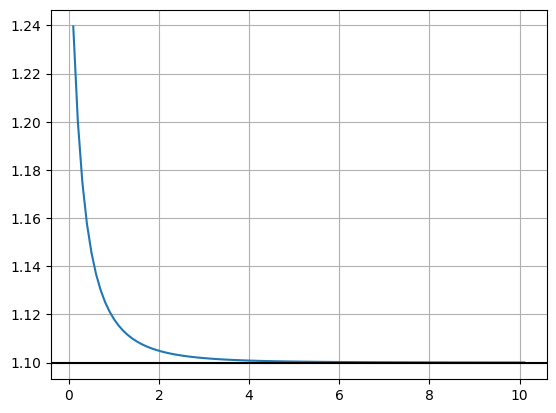

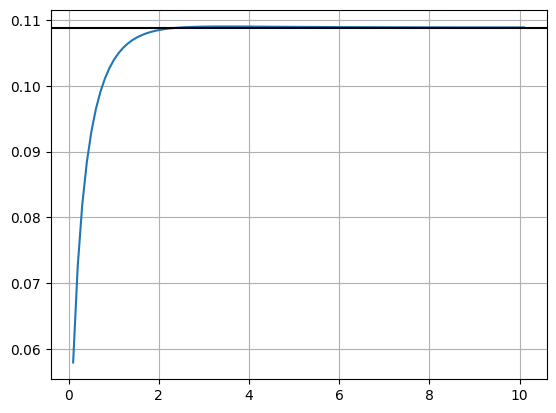

In [1]:
import numpy as np

def calculate_ratio(cl, h, b, AR):
    beta = np.sqrt(1 + (2*h/b)**2) - 2*h/b
    ratio = (1 - np.exp(-2.48 * (2*h/b)**0.768)) / (1 - beta* cl / (4 * np.pi * AR * h/b))
    return ratio

def calculate_lift_coefficient_ratio(h, b, ar):
    ratio = 1 + (288 * (h/b)**0.787 * np.exp(-9.14 * (h/b)**0.327)) / ar**0.882
    return ratio

b = 2.
AR = 9 
h = 0.1 + np.linspace(0. + 1e-10,10, 100)
cl_orig = 1.1
cd_orig = 0.09 * cl_orig**2

# Calculate new CL
inc_cl = calculate_lift_coefficient_ratio( h, b, AR)
cl_new = cl_orig * inc_cl

ratio_inc = calculate_ratio(cl_orig, h,b,AR)
cd_i_new = (cd_orig / cl_orig**2) * ratio_inc * (cl_new)**2


# plot
import matplotlib.pyplot as plt

plt.plot(h,cl_new/cd_i_new)
plt.axhline(cl_orig/cd_orig, color = 'k')
# plt.plot(h,(cl_orig*inc_cl))
plt.grid()
plt.show()


plt.plot(h,cl_new)
plt.axhline(cl_orig, color = 'k')
plt.grid()

plt.show()

plt.plot(h,cd_i_new)
plt.grid()
plt.axhline(cd_orig, color = 'k')

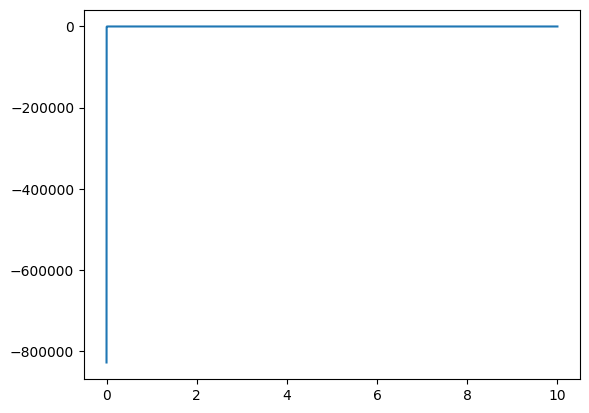

In [2]:
AR = 9
h = np.linspace(0.0001, 10, 10000)
clh_clinf = 1
b = 2.
cl = 1
cdi = 0.1 * cl ** 2

clh_clinf = 1 + (288 * (h / b) ** 0.787 * np.exp(-9.14 * (h / b) ** 0.327) / AR ** 0.882)
beta = np.sqrt(1 + (2 * h / b) ** 2) - 2 * h / b

cdicl2h_cdicl2inf = (1 - np.exp(-2.48 * (2 * h / b) ** 0.768)) / (1 - beta * cl / (4 * np.pi * AR * h / b))
cdicl2h = cdicl2h_cdicl2inf * (cdi / cl ** 2)

# update cl, cdi
cl = clh_clinf * cl
cdi = cdicl2h * cl ** 2

import matplotlib.pyplot as plt
# plt.plot(h, clh_clinf)
# plt.plot(h,cdi)
plt.plot(h,cl/cdi)
# plt.axhline(1, color='k', linestyle='--')